---
 Microeconometrics | Summer 2020, M.Sc. in Economics, University of Bonn | [Sona Verdiyeva](https://github.com/s6soverd)
# Replication of the paper:

Pop-Eleches, Cristian, and Miguel Urquiola. 2013. "Going to a Better School: Effects and Behavioral Responses."  *American Economic Review*, 103 (4): 1289-1324. 

---

This notebook contains replication of results, tables and figures from the paper mentioned above. The original paper, including the data sets, and the codes by the authors can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/aer.103.4.1289). As far as the replication concerns, all the figures and tables, I have replicated, are labelled as they apear in Pop-Eleches et al. (2013).

### Table of Contents

* [1.Introduction](#introduction)
   
* [2.Data](#data)
    * [2.1. Administrative Data](#administrative_data)
    * [2.2. Survey Data](#survey_data)
* [3. Empirical Strategy](#empirical_strategy)
    * [3.1. Empirical Setup for a Single Between-school Cutoff](#single_cutoff)
    * [3.2. Summarizing Information for Many Cutoffs](#many_cutoffs)
* [4. Results](#results)
    * [4.1. The First Stage](#the_first_stage)
    * [4.2. Baccalaureate Outcomes](#bacca_outcomes)
    * [4.3. Heterogeneity in Baccalaureate Outcomes](#hetero_bacca)
    * [4.5. Behavioral Responses and Equilibrium Effects](#behav_resp)
* [5. Extension](#extension)
    * [5.1. Bandwidth Selection](#bandwidth)
* [6. Conclusion](#conclusion)
* [7. References](#references)


In [ ]:
---
## 1. Introduction <a class="anchor" id="introduction"></a>
---

Pop-Eleches et al. (2013) examines the effect of going to a better school on student outcomes and on behavioral responses that amplify or reduce the quality of educational quality. They apply ***regression discontinuity design*** to the Romanian secondary school system, producing two findings. First, students who gain access to higher achievement schools perform better in a graduation test. Secondly, the opportunity to attend quality-wise better schools result in significant behavioral responses, particularly:

> i)Teachers sort in a manner consistent with a preference for higher achieving students;
>
> ii) Children who get into better schools realize they are relatively weaker and feel marginalized;
>
> iii) Parents reduce their effort when their children attend a better school.
>

Identifying the effect of access to a better school is challenging, partly because students are not randomly allocated to schools. In this regard, the authors exploit the research design - **regression discontinuity** - to Romania's high school system, taking advantage of the fact that as the students transition into secondary education, Romanian children's ability to choose a high school depends merely on a score which is the average of their performance on nationwide test and their grade point average. After getting their transition score, students hand in a list of high schools and track combinations they wish to enroll in. These tracks are basically "schools within a school" such that students enrolled in that track take classes together and do not take classes with members of other tracks.

**Main Variables**

| **Treatment**          | **Main Outcomes**       |  **Main Covariates**                                        |
|------------------------|-------------------------|-------------------------------------------------------------|
|Going to a better school|Baccalaureate Performance| Indicator variable whether a student's score is above cutoff|
|                        |Teacher characteristics  |                                                             |
|                        |Parental effort          |                                                             |
|                        |Interaction with peers   |                                                             |

After students submit their choices, they get allocated to school/tracks via centralized system that allocates first the higher scoring students' request, subject to slot constraints. This naturally leads to creation of cutoff scores that determine access into scholls/tracks and the authors show that there are clear discontinuities in educational quality at these cutoffs. The effect of attending a better school that authors explore is that indeed students do benefit from access to higher-ranked schools and tracks within schools. In particular, compared to students who just miss scoring above a school cutoff, those who succeed display a statistically significant increase in their Baccalaureate performance. \
The structure of the this jupyter file is as follows. In the next section, the types and descriptive statistics of data is explained. The Section3 illustrates the empirical set-up and regression specifications. In the Section 4, the results are elucidated using the replication of original table and figures in the paper. The proceeding Section - Extension - displays my writing of the functions to calculate optimal Imbens and Kalyanaraman (2009) bandwidth in codes, using the functions in their paper "*Optimal Bandwidth Choice For The Regression Discontinuity Estimator*", and Table 5 in the paper is built using optimal bandwidth using my function. The last 2 sections encompass Conclusions and References part of this jupyter notebook.
    

---
## 2. Data <a class="anchor" id="data"></a>
---

Two types of data are used:
>
> i) Administrative data that covers the information on all of the children
>
> ii) The data from a survey that the authors administered in towns with two or three high schools.
>

### 2.1. Administrative Data <a class="anchor" id="administrative_data"></a>

Administrative data covers the 2001-2003 and 2005-2007 admission cohorts. They provide the name, gymnasium, transition score, and the allocated school/track for all students, but no inofrmation on their ranking of school/tracks or their socio-economic characteristics. The authors used two subsamples of these data set, namely:
>
> i) The 2001-2003 cohorts, for which the authors merged admissions data with information on whether students took the Baccalaureate exam(in 2005-2007) and how they performed.
>
> ii) The 2005-2007 cohorts, for which there was only admissions data available (meaning, no information on Baccalaureate performance). Thus, this subsample is only used to explore "first stages". 
>

Table 1 below presents the descriptive statistics for the students admitted to high school during 2001-2003

In [1]:
# installing the necessary packages
# installing the necessary packages

import pandas as pd
import numpy as np
import math
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import econtools
import econtools.metrics as mt
import statsmodels.api as smp
import patsy

In [2]:
# importing the functions for tables and figures
from auxiliary.project_auxiliary_plots import *
from auxiliary.project_auxiliary_tables import *

In [3]:
# necessary data sets for creation of Table 1
#df4_columns = ['Unnamed: 0', 'grade', 'bcg', 'bct', 'year', 'ua', 'us', 'us2', 'ct', 'survey']
df4 = pd.read_csv('data/df4.csv', sep = ",", header = 0, low_memory = False)
df4.drop('Unnamed: 0', axis = 1, inplace = True)
#df5_columns = ['Unnamed: 0', 'grade', 'bcg', 'bct', 'year', 'ua', 'us', 'us2', 'ct', 'survey']
df5 = pd.read_csv('data/df5.csv', sep = ",", header = 0, low_memory = False)
df5.drop('Unnamed: 0', axis = 1, inplace = True)
#df6_columns = ['Unnamed: 0', 'grade', 'bcg', 'bct', 'year', 'ua', 'us', 'us2', 'ct', 'survey']
df6 = pd.read_csv('data/df6.csv', sep = ",", header = 0, low_memory = False)
df6.drop('Unnamed: 0', axis = 1, inplace = True)

---
<span style="color:black">**Table 1**:</span> Descriptive Statistics, Administrative Data: 2001-2003 Cohorts

---

In [4]:
panel_A1_1, panel_A2_1, panel_A3, panel_A4, panel_B1_1, panel_B2_1, panel_B3, panel_B4 = table1(df4, df5, df6)
display(panel_A1_1, panel_A2_1, panel_A3, panel_A4, panel_B1_1, panel_B2_1, panel_B3, panel_B4)

,Obs. 2001,Mean 2001,Sd 2001,Obs. 2002,Mean 2002,Sd 2002,Obs. 2003,Mean 2003,Std 2003
Panel A.1. Individual Level,,,,,,,,,
Transition grade,107812.0,7.676340,0.934957,110912.0,7.868791,0.860418,115413.0,7.956968,0.966390
Baccalaureate taken,107812.0,0.847151,0.359844,110912.0,0.821579,0.382868,115413.0,0.808081,0.393812
Baccalaureate grade,87411.0,8.312978,0.932631,85946.0,8.275427,0.954276,84076.0,8.509938,0.874984


,Obs. 2001,Mean 2001,Sd 2001,Obs. 2002,Mean 2002,Sd 2002,Obs. 2003,Mean 2003,Std 2003
Panel A.2. Track Level,,,,,,,,,
Number of ninth grade students,1722.0,62.608595,49.007299,1665.0,66.613814,50.632874,1615.0,71.463158,53.254547


,Obs. 2001,Mean 2001,Sd 2001,Obs. 2002,Mean 2002,Sd 2002,Obs. 2003,Mean 2003,Std 2003
Panel A.3. School Level,,,,,,,,,
Number of ninth grade students,797.0,135.272271,61.351589,789.0,140.572877,63.053690,801.0,144.086142,69.159427
Number of Tracks,797.0,2.160602,1.172038,789.0,2.110266,1.155107,801.0,2.016230,1.162319


,Obs. 2001,Mean 2001,Sd 2001,Obs. 2002,Mean 2002,Sd 2002,Obs. 2003,Mean 2003,Std 2003
Panel A.4. Town Level,,,,,,,,,
Number of ninth grade students,134.0,804.567164,849.587175,134.0,827.701493,875.496010,135.0,854.911111,919.536819
Number of Schools,134.0,5.947761,5.985342,134.0,5.888060,5.798185,135.0,5.933333,5.926414
Number of tracks,134.0,12.850746,11.891431,134.0,12.425373,11.427692,135.0,11.962963,10.943824


,Obs. 2001,Mean 2001,Sd 2001,Obs. 2002,Mean 2002,Sd 2002,Obs. 2003,Mean 2003,Std 2003
Panel B.1. Individual Level,,,,,,,,,
Transition grade,14951.0,7.578195,0.905895,15257.0,7.853495,0.843460,15641.0,7.890173,0.919054
Baccalaureate taken,14951.0,0.832252,0.373655,15257.0,0.811759,0.390918,15641.0,0.805831,0.395572
Baccalaureate grade,11966.0,8.365042,0.872836,11821.0,8.319198,0.904936,11312.0,8.628779,0.818854


,Obs. 2001,Mean 2001,Sd 2001,Obs. 2002,Mean 2002,Sd 2002,Obs. 2003,Mean 2003,Std 2003
Panel B.2. Track Level,,,,,,,,,
Number of ninth grade students,296.0,50.510135,37.157565,284.0,53.721831,38.825105,284.0,55.073944,42.456107


,Obs. 2001,Mean 2001,Sd 2001,Obs. 2002,Mean 2002,Sd 2002,Obs. 2003,Mean 2003,Std 2003
Panel B.3. School Level,,,,,,,,,
Number of ninth grade students,123.0,121.552846,54.657533,123.0,124.040650,54.366455,123.0,127.162602,64.479552
Number of Tracks,123.0,2.406504,1.329596,123.0,2.308943,1.319029,123.0,2.308943,1.331399


,Obs. 2001,Mean 2001,Sd 2001,Obs. 2002,Mean 2002,Sd 2002,Obs. 2003,Mean 2003,Std 2003
Panel B.4. Town Level,,,,,,,,,
Number of ninth grade students,55.0,271.836364,126.603605,55.0,277.400000,126.045641,55.0,284.381818,140.799107
Number of Schools,55.0,2.236364,0.428764,55.0,2.236364,0.428764,55.0,2.236364,0.428764
Number of tracks,55.0,5.381818,1.672112,55.0,5.163636,1.823343,55.0,5.163636,1.572491


Every 3 columns represent observations, mean and standard deviation of the given variable, from 2001 to 2003. Panel A describes all Romanian towns, except Bucharest and towns that contain a single school. Panel A.1 presents student level statistics, and Panel A.2, Panel A.3, and Panel A.4, refer to characteristics at the track, school, and town level, respectively. Panel B.1-B.4 present analagous information for the towns that the authors have conducted surveys in. 

### 2.2. Survey Data <a class="anchor" id="survey_data"></a>

Administrative dataset provides basic information, by which one can not explore behavioral responses. Survey data was conducted for 2005-2007 cohorts, who were still in the school. The survey administered to parents and students at home, having three components. First, the parents were interviewed to obtain demographic information and household characteristics. Second, the primary caregivers were asked to provide information on each child. And thirdly, seperate interviews were conducted with children from the selected schools. Survey data was gathered only from towns with two or three schools. The rationale the authors used for this restriction was that Pop-Eleches et al. (2013) needed information about students on either side of admission cutoffs; thus, it was essential that all schools in each town agree to participate, and this effort was likely to encounter problems in larger towns. 

Table 2 below presents descriptive statistics from this survey data.

In [5]:
# necessary datasets for creation of Table 2:
df7 = pd.read_csv('data/df7.csv', sep = ",", header = 0, low_memory = False)
df7.drop('Unnamed: 0', axis = 1, inplace = True)

---
<span style="color:black">**Table 2**:</span> Descriptive Statistics, Survey Data: 2005-2007 Cohorts

---

In [6]:
panel_A_1, panel_A_2, panel_A_3, panel_A_4, panel_B1, panel_C, panel_D = table2(df7)
display(panel_A_1, panel_A_2, panel_A_3, panel_A_4, panel_B1, panel_C, panel_D)

,count,mean,std
Socioeconomic Characteristics,,,
Female head of household,11931.0,1.112480,0.315969
Age of household head,11843.0,46.752428,7.145200


,count,mean,std
Ethnicity of household head,,,
Romanian,11931.0,0.938396,0.240445
Hungarian,11931.0,0.050122,0.218205
Gypsy,11931.0,0.003185,0.056348
Other,11931.0,0.008298,0.090717


,count,mean,std
Education of household head,,,
Primary,11840.0,0.664865,0.472058
Secondary,11840.0,0.204899,0.403645
Tertiary,11840.0,0.130236,0.336578


,count,mean,std
Age and Sex of the child,,,
Female child,11931.0,1.583522,0.492995
Age of child,11866.0,18.077027,0.938730


,count,mean,std
Parental responses,,,
Parent has volunteered at school in the past 12 months,11868.0,0.110971,0.314109
Parent helps child with homework every day or almost every day,11815.0,0.196868,0.397649
Child does homework every day or almost every day,11779.0,0.751507,0.432158
Parent has paid for tutoring services in the past 12 months,11850.0,0.228397,0.435690


,count,mean,std
Child responses,,,
Index of negative interactions with peers,11838.0,0.121009,0.368762
Child does homework daily or almost daily,11908.0,0.631592,0.482393
Child perceives homework to be easy,9628.0,5.450145,1.015461
Relative rank among peers,11798.0,3.849720,1.306227


,count,mean,std
Language Teacher qualifications,,,
Proportion of teachers with highest state certification,11169.0,0.607575,0.488312
Proportion of teachers who are novices,11169.0,0.060525,0.238467


---
<span style="color:orange">**Notes**:</span> 

In Panel D. Language teacher qualifications, the variable "years of experience" is not included, since part of the data for that variable was strings; e.g., "very satisfied ", "very dissatisfied ", for which I don't have any information what those strings equal to in terms of "years". 

---

---
## 3. Empirical Strategy <a class="anchor" id="empirical_strategy"></a>
---

Within each town, the authors have ranked schools and school/tracks according to their average score, and set the cutoffs equal to their minimum scores. In other words, each school's (or school/track's) cutoff is set to equal to the score of the child with the lowest transition score. 

---
### 3.1. Empirical Setup for a Single Between-school Cutoff<a class="anchor" id="single_cutoff"></a>
---

Consider a town in which *i* indexes students and *s* = 1,...,*S* indexes schools, where 1 is the worst, *S* is the best school, in terms of the average transition score among its admitted students. In addition, let *z* = 1,...,(*S* - 1) be index cutoffs, such that, e.g., *z* = 1 denotes the cutoff between the worst and next-to-worst school in the town, and *z* = (*S*-1) indicates the cutoff between the top-ranked school and the next best institution. Let $ t_{i} $ denote student *i*'s transition score, and $\tilde{t}_{z}$ be the minimum grade required for admission into the higher-ranked of the two schools indexed by *z*. Then the "*reduced form*" regression is:
 
---
$$ y_{i} = \alpha\,1\{t_{i} - \tilde{t}_{z}\geq\,0\} + a(t_{i}) + \varepsilon_{i}, $$ (4)

---

where *y* is an outcome, $1\{t_{i} - \tilde{t}_{z}\geq\,0\}$ is an indicator for whether a students' transition grade is greater or equal to the cutoff indexed by *z*, and $a(t_{i})$ is a control for the transition score. As outcomes, *y* can be students' Baccalaureate performance, as well as, features related to behavioral characteristics of teachers, students, and parents. 

Suppose the transition score is smoothly related to characteristics that affect achievement, i.e., $a(t)$ is constant in a small enough neighborhood around the cutoff. Under this assumption, students with scores just below $\tilde{t}_{z}$ can be adequately categorized as the control group, in relation to those who score just above, and any difference in their outcomes can be attributed to the fact that they get into qualiti-wise different schools. 

Pop-Eleches et al. (2013) also present some parts of the results using instrumental type specification:


(5)
$$ y_{i} = \gamma\,E(T_{i}|t_{i}) + a(t_{i}) + e_{i}  \\
   E(T_{i}|t_{i}) = \beta\,1\{t_{i}\geq\tilde{t}_{z}\} + a(t_{i}),  
$$
(6)



where (6) is the "*first stage*" and $T_{i}$ stands for the average transition score among student *i*'s peers. If the mean of *T* conditional on the transition score is discontinous at $\tilde{t}_{z}$, then (5)-(6) will consistently estimate $\gamma\$ -the effect of having access to a higher ranked school as measured by peer group quality. 


---
### 3.2. Summarizing Information for Many Cutoffs<a class="anchor" id="many_cutoffs"></a>
---

The above specifications only show how one might exploit one cutoff. The data set contains thousands of cutoffs, as the authors have gathered the data from almost all towns in Romania. So the data set is stacked in a way that every student is served as an observation for every cutoff. This however, mainly applies to students who score high, because then they can get enrolled in whatever school they want. For those students in bands close to cutoffs, they rarely use student-level observations more than once.

Most of the reduced form regressions in the paper are specified as follows:

(7)
$$ y_{iz} = \alpha\,1\{t_{i} - \tilde{t}_{z}\geq\,0\} + \eta(t_{i} - \tilde{t}_{z})\,x\,1\{t_{i} - \tilde{t}_{z}\geq\,0\} + \omega_{z} + \nu_{i}, $$


that is, a regression of outcomes on a dummy whether the student's score is above cutoff, along with controls that include: (i) a linear spline in students' grade distance to the cutoff, and one which allows the slope to vary on each side of  the cutoff, and (ii) a full set of cutoff dummies, $\omega_{z}$

---
## 4. Results<a class="anchor" id="results"></a>
---


### 4.1. The First Stage<a class="anchor" id="the_first_stage"></a>

Pooling all between-school cutoffs, **Figure 1** summarizes results of specifications analagous to (6). In Panel A, x-axis describes students' transition scores relative to the cutoffs that allow the opportunity to access a better school; y-axis describes the peer quality students expereince; meaning, the average transition score that the student observe in his/her school. Panel B plots analogous information, but instead of having mean transition score in the y-axis, here, y-axis is based on the residuals from a regression of the mean transition score on cutoff fixed effects. It is apparent from both panels that the average peer quality that students experience increases dramatically and discontinously (meaning, with jumps) if the transition score of the student just crosses the threshold that gives them the access to a better-ranked school. 

Panels C and D in Figure 1 presents the graphical evidence as to there is any changes in test-taking rates at the cutoffs. As it is apparent from the plots, the test-taking rate (the probability of taking the Baccalaureate exam) doesn't change as student's transition score lets him access to a better school. 

Panels E and F in Figure 1 describe grade outcomes at the cutoffs, showing a discrete increase in average achievement.

---
<span style="color:blue">**Figure 1.**</span> Between-School Cutoffs: All Towns

---

In [3]:
# Preparing the data for the plots in Figure 1.
chunksize = 100000
chunks = []
for chunk in pd.read_csv('data/df1.csv', sep = ",", header = 0, chunksize=chunksize, low_memory=False):
    chunks.append(chunk)
df1 = pd.concat(chunks, axis=0)

df1.drop('Unnamed: 0', axis = 1, inplace = True)

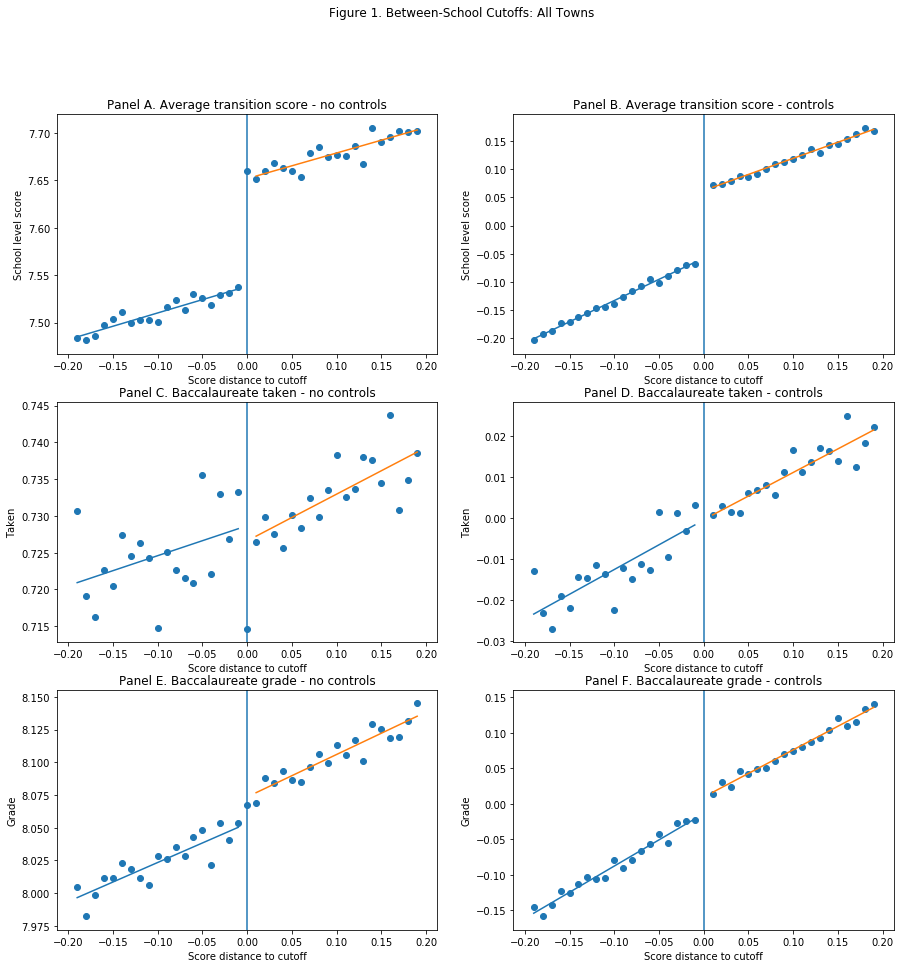

In [8]:
# Figure 1
fig1_df1 = figure1_nocontrol(data1 = df1, cols = ["agus", "bct", "bcg"])
fig1_df2 = figure1_control(data1 = df1, cols = ["agus", "bct", "bcg"])
figure1(data1 = fig1_df1, data2 = fig1_df2)

---
<span style="color:orange">**Notes:**</span> \
All panels are based on administrative data for the 2001-2003 admission cohorts, and restrict observations to individuals with transition scores within 0.2 points of a cutoff. The left-hand-side panels plot transition score means of the dependent variable. The right-hand-side panels plot analogous means of residuals from a regression of the dependent variable on cutoff fixed effects. Solid lines, in each panel, are fitted values of regressions of dependent variables on a linear trend in the transition score, estimated seperately on each side of the cutoff. The dependent variable in panels A and B is the average transition score of the peers students experience at school. The dependent variable in Panels C and D is an indicator for having taken the Baccalaureate test; the dependent variable in Panels E and F is the Baccalaureate exam grade.

---

---
<span style="color:black">**Table 3**:</span> First Stages

---

In [9]:
# Preparing the data for the panels in Table 3.
chunksize3 = 100000
chunks3 = []
for chunk in pd.read_csv('data/df3.csv', sep = ",", header = 0, chunksize=chunksize3, low_memory=False):
    chunks3.append(chunk)
df3 = pd.concat(chunks3, axis=0)

df3.drop('Unnamed: 0', axis = 1, inplace = True)

In [10]:
chunksize2 = 100000
chunks2 = []
for chunk in pd.read_csv('data/df2.csv', sep = ",", header = 0, chunksize=chunksize2, low_memory=False):
    chunks2.append(chunk)
df2 = pd.concat(chunks2, axis=0)

df2.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
# Abbreviated as IK (Imbens and Kalyanaraman (2009)) bandwidths, 
# which I have stored in a list for all panels in table 3.
ik_list = [0.59298368, 0.99663389, 0.6738998100235114, 0.9545617206625753,
          0.6111967562362197, 0.8470256881107427,
          1.150684676743349, 0.603416800718924]
# Panel A.
panel3_A_1, panel3_A_2 = table3_panelA(df1, ik_list)
display(panel3_A_1, panel3_A_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel A.School-level average transition grade: 2001-2003, All towns, between-school cutoffs",,,,
Within 1 point_cutoff,0.602424,0.106572,0.001009,0.0
Within IK bound,0.416724,0.114607,0.001187,0.0


,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel A.School-level average transition grade: 2001-2003, Survey towns, between-school cutoffs",,,,
Within 1 point_cutoff,0.521224,0.44716,0.006671,0.0
Within IK bound,0.520774,0.44707,0.006680,0.0


In [12]:
# Panel B.
panel3_B_1, panel3_B_2 = table3_panelB(df3, ik_list)
display(panel3_B_1, panel3_B_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel B.Track-level average transition grade: 2001-2003, All towns, between-track cutoffs",,,,
Within 1 point_cutoff,0.708869,0.062971,0.000561,0.0
Within IK bound,0.569770,0.070101,0.000640,0.0


,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel B.Track-level average transition grade: 2001-2003, Survey towns, between-track cutoffs",,,,
Within 1 point_cutoff,0.578530,0.188019,0.003149,0.0
Within IK bound,0.568184,0.188079,0.003181,0.0


In [13]:
# Panel C.
panel3_C_1, panel3_C_2 = table3_panelC(df1, ik_list)
display(panel3_C_1, panel3_C_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel C.Track-level average transition grade: 2001-2003, All towns, between-school cutoffs",,,,
Within 1 point_cutoff,0.694309,0.072663,0.000862,0.0
Within IK bound,0.522283,0.081893,0.000984,0.0


,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel C.Track-level average transition grade: 2001-2003, Survey towns, betweem-school cutoffs",,,,
Within 1 point_cutoff,0.588426,0.266019,0.005542,0.0
Within IK bound,0.557833,0.274260,0.005903,0.0


In [14]:
# Panel D.
panel3_D_1, panel3_D_2 = table3_panelD(df2, ik_list)
display(panel3_D_1, panel3_D_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel D.School-level average transition grade: 2005-2007, All towns, between-school cutoffs",,,,
Within 1 point_cutoff,0.649204,0.106146,0.001004,0.0
Within IK bound,0.693646,0.105875,0.000944,0.0


,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel D.School-level average transition grade: 2005-2007, Survey towns, between-school cutoffs",,,,
Within 1 point_cutoff,0.494821,0.413844,0.007055,0.0
Within IK bound,0.428610,0.438035,0.008743,0.0


Table 3, Panel A, rows refer to whether the data is within 1 point of the cutoff or within the bound suggested by IK method of selecting the bandwidth. The another split within all the Panels, including within Panel A, is whether the data is gathered from all towns or survey towns only. In Panel A, the average transition grade that students experience at school is regressed over an indicator for whether their scores are above cutoffs. The specification, additionally, includes: (i) a linear spline in students' grade distance to the cutoffs, one which allows the slope to vary on either side of the cutoff, and (ii) cutoff/year dummies. I have got for all the tables, including **Table 3**, with 0.001 accuracy, the coefficients and the standard errors (standard errors are robust). However, the R-squared that is displayed are oddly skewed for all my results, relative to the R-squared shown in STATA results of the authors'. I calculated manually the R-squared for some tables, to see whether the reported R-squared's are indeed computed correctly, and my calculated R-squared's were indeed equal to the displayed R-squared via statsmodels package that I have used for the regression purposes. The results suggest that scoring above a cutoff results in a highly statistically significant jump in peer quality - 0.11 points. 

Panel B and C regresses the track level average transition grade that students experience over an indicator for whether their scores are above cutoffs. The coefficient of interest for the between-track cutoff is a little smaller than that observed for the between-school cutoffs. The implication being that students with access to higher ranked schools experience better peers; however, this effect is more accentuated if the measure is average score of their school-level, rather than their track-level. Panel C confirms this by exploring how the *track level average transition grade* students experience changes at the cutoffs that determine access to a better school. The results are significant, but smaller than those observed when peer groups are defined at the school level, (Panel A).



---
<span style="color:blue">**Figure 2.**</span> Top and Bottom Cutoffs in Towns with Three or More Schools: Two-School Towns

---

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


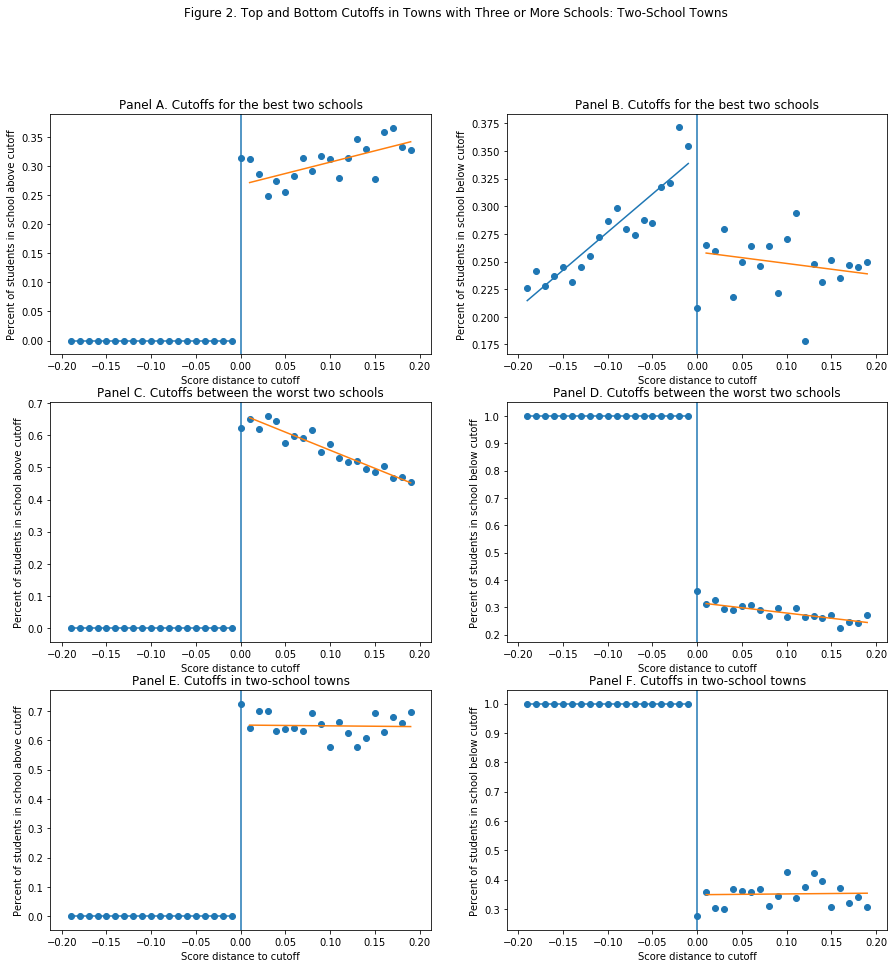

In [15]:
# Figure 2 
fig2_df1 = figure2_df1(data1 = df1, cols = ["first", "second"])
fig2_df2 = figure2_df2(data1 = df1, cols = ["first", "second"])
fig2_df3 = figure2_df3(data1 = df1, cols = ["first", "second"])
figure2(data1 = fig2_df1, data2 = fig2_df2, data3 = fig2_df3)

---
<span style="color:orange">**Notes:**</span> \
Panels A and B describe cutoffs that determine access to the best school in towns that contain at least three schools. Panels C and D refer to the lowest cutoffs in such towns. Panels E and F describe the cutoffs in two-school towns. The left-hand panels plot transition means of the proportion of students who attend the school above the cutoff; the right-hand-side panels plot the proportion of students who enroll in the school below. The solid lines plot fitted values of residuals from regressions of the dependent variable on a linear trend in the transition score, estimated seperately on each side of the cutoff.

---

Figure 2, Panel A and B summarize information regarding the cutoffs that seperate the best and second-best school in towns with at least three schools. Panel A plots transition score means of the percentage of students who attend the highest-ranked school, it is not surprising to see that the percentage is zero when students scores are to the left of the cutoff, because then students are not eligible to attend the highest-ranked school. And to the right of the cutoff, we see that, only 40 percent of the students eligible to attend highest-ranked school take advantage of that. Panel B, which plots the percentage of individuals in the second best school, shows that around 25-30 percent of those eligible for the best decide to remain in the second-best school.


### 3.2. Baccalaureate Outcomes <a class="anchor" id="bacca_outcomes"></a>

---
<span style="color:black">**Table 4**:</span> Effects on Baccalaureate Taking and Performance

---

In [16]:
# IK bounds stored in a list
ik_list_table4 = [1.1583899289250266, 1.4310074873570213, 1.1363697344378791, 0.9348228603420937,
                  1.1363697344378791, 0.9348228603420937, 0.9377290227673393, 0.8278209355247328,
                 0.9466482562703121, 0.9763999400511206]

In [17]:
# Panel A
panel4_A_1, panel4_A_2 = table4_panelA(df1, ik_list_table4)
display(panel4_A_1, panel4_A_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel A.Baccalaureate taken dummy: 2001-2003, All towns, between-school cutoffs",,,,
Within 1 point_cutoff,0.014893,0.000282,0.001244,0.820450
Within IK bound,0.017941,0.000718,0.001171,0.539735


,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel A.Baccalaureate taken dummy: 2001-2003, Survey towns, between-school cutoffs",,,,
Within 1 point_cutoff,0.022811,0.011921,0.008543,0.162889
Within IK bound,0.032250,0.006105,0.007225,0.398134


In [18]:
# Panel B
panel4_B_1, panel4_B_2 = table4_panelB(df1, ik_list_table4)
display(panel4_B_1, panel4_B_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel B.Baccalaureate grade: 2001-2003, All towns, between-school cutoffs",,,,
Within 1 point_cutoff,0.266944,0.018183,0.002301,2.732573e-15
Within IK bound,0.307299,0.019034,0.002188,3.317109e-18


,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel B.Baccalaureate grade: 2001-2003, Survey towns, between-school cutoffs",,,,
Within 1 point_cutoff,0.256225,0.103254,0.015347,1.718552e-11
Within IK bound,0.242722,0.098653,0.015939,6.037702e-10


In [19]:
# Panel C
panel4_C_1, panel4_C_2 = table4_panelC(df1, ik_list_table4)
display(panel4_C_1, panel4_C_2)

,Average school transition grade,Standard Error,P-value
"Panel C.Baccalaureate grade: 2001-2003, All towns, between-school cutoffs, IV specification",,,
Within 1 point_cutoff,1.039900,0.000212,0.0
Within IK bound,1.040785,0.000199,0.0


,Average school transition grade,Standard Error,P-value
"Panel C.Baccalaureate grade: 2001-2003, Survey towns, between-school cutoffs, IV specification",,,
Within 1 point_cutoff,1.021932,0.001346,0.0
Within IK bound,1.022233,0.001385,0.0


In [20]:
# Panel D
panel4_D_1, panel4_D_2 = table4_panelD(df3, ik_list_table4)
display(panel4_D_1, panel4_D_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel D.Baccalaureate taken dummy: 2001-2003, All towns, between-track cutoffs",,,,
Within 1 point_cutoff,0.014224,-0.001152,0.000770,0.134838
Within IK bound,0.012900,-0.000948,0.000792,0.231562


,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel D.Baccalaureate taken dummy: 2001-2003, Survey towns, between-track cutoffs",,,,
Within 1 point_cutoff,0.020649,-0.000148,0.004077,0.970982
Within IK bound,0.016259,-0.000721,0.004326,0.867614


In [21]:
# Panel E
panel4_E_1, panel4_E_2 = table4_panelE(df3, ik_list_table4)
display(panel4_E_1, panel4_E_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel E.Baccalaureate grade: 2001-2003, All towns, between-track cutoffs",,,,
Within 1 point_cutoff,0.286329,0.011322,0.001400,6.128972e-16
Within IK bound,0.269501,0.011023,0.001433,1.444379e-14


,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel E.Baccalaureate grade: 2001-2003, Survey towns, between-track cutoffs",,,,
Within 1 point_cutoff,0.272859,0.036471,0.006883,1.167703e-07
Within IK bound,0.266820,0.036333,0.006935,1.616260e-07


One of the first things that is explored is whether students took the Baccalaureate exam, and this is looked into in Figure 1, Panel C and D, where we saw that there is no change in the probability of taking Baccalaureate exam. This is also further confirmed in Panel A of Table 4, where we see that the coeffiecients are almost zero, and insignificant. Similar result surfaces in Panel D, where students are given the chance to enroll in a better track, coeffiecients are close to zero, and insignificant. In Panel B, we see that students who score above cutoffs, thereby, getting the opportunity to attend a better school, show better performance in Baccalaureate exam.


### 3.3. Heterogeneity in Baccalaureate Outcomes <a class="anchor" id="hetero_bacca"></a>

---
<span style="color:blue">**Figure 3.**</span> Top and Bottom Terciles of Between-School Cutoffs

---

C:\Users\Lenovo\Desktop\microeconometrics-course-project-s6soverd\auxiliary\project_auxiliary_plots.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_fig3_2["{}_res".format(column)] = residual
C:\Users\Lenovo\Desktop\microeconometrics-course-project-s6soverd\auxiliary\project_auxiliary_plots.py:440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_fig3_4["{}_res".format(column)] = residual


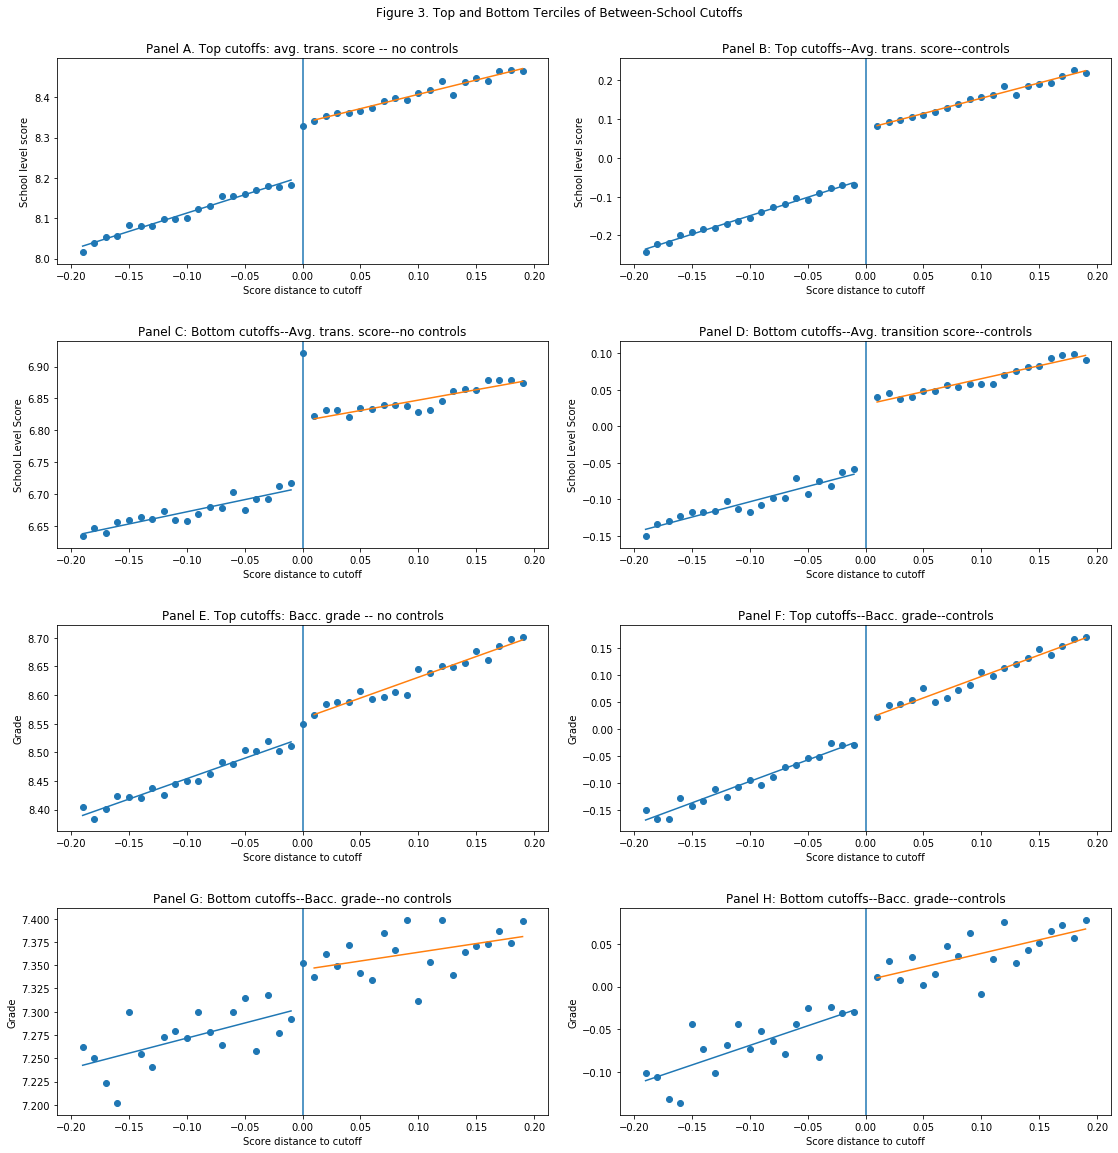

In [22]:
fig3_df1 = figure3_df1(data1 = df1, cols = ["agus", "bcg"])
fig3_df2 = figure3_df2(data1 = df1, cols = ["agus", "bcg"])
fig3_df3 = figure3_df3(data1 = df1, cols = ["agus", "bcg"])
fig3_df4 = figure3_df4(data1 = df1, cols = ["agus", "bcg"])
figure3(data1 = fig3_df1, data2 = fig3_df2, data3 = fig3_df3, data4 = fig3_df4)

Now we will see how the Baccalaureate effects vary according to the cutoffs are located in the transition score distribution. In this regard, Figure 3 presents the first stages observed in the top and bottom terciles os between-school cutoffs. In Panel A and B, C and D we see that there is change in the average transition score of the peers students encounter. However this change is magnititude-wise larger at the top-tercile of the cutoff, than it is at the bottom-tercile. Panels E-H displays the Baccalaureate grade for students at the top and bottom-tercile of cutoffs. And we see in Panels E and F that if students attend higher-ranked school at the top-tercile of cutoffs, their Baccalaureate performance in terms of grade improves hugely. However, the same doesn't hold for students who are at the bottom-tercile of cutoffs. Meaning, students who attend worse school will not improve a lot, if they were to attend a little worse school, instead. 

---
<span style="color:black">**Table 5:**</span> Heterogeneity in Baccalaureate Effects

---

In [23]:
# Panel A
panel5_A_1, panel5_A_2 = table5_panelA(df1)
display(panel5_A_1, panel5_A_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Panel A. Full sample,,,,
School-level Average transition score,0.602424,0.106572,0.001009,0.000000e+00
Bacca. taken,0.014893,0.000282,0.001244,8.204500e-01
Bacca. grade,0.266944,0.018183,0.002301,2.732573e-15


,1{Transition grade >= cutoff},Standard Error,P-value
Panel A. Full sample,,,
"Baccalaureate grade, IV specification",1.0399,0.000212,0.0


In [24]:
# Panel B
panel5_B_1, panel5_B_2 = table5_panelB(df1[df1["zga"] > 7.74])
display(panel5_B_1, panel5_B_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Panel B. Top tercile,,,,
School-level Average transition score,0.695944,0.157218,0.001707,0.000000e+00
Bacca. taken,0.010531,0.002878,0.001910,1.317702e-01
Bacca. grade,0.349365,0.048322,0.003382,2.572091e-46


,1{Transition grade >= cutoff},Standard Error,P-value
Panel B. Top tercile,,,
"Baccalaureate grade, IV specification",1.025309,0.00029,0.0


In [25]:
# Panel C
panel5_C_1, panel5_C_2 = table5_panelC(df1[df1["zga"] < 6.77])
display(panel5_C_1, panel5_C_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Panel C. Bottom tercile,,,,
School-level Average transition score,0.309337,0.100885,0.003224,6.663301e-215
Bacca. taken,0.019355,-0.007810,0.004166,6.083481e-02
Bacca. grade,0.093026,-0.004385,0.008604,6.103265e-01


,1{Transition grade >= cutoff},Standard Error,P-value
Panel C. Bottom tercile,,,
"Baccalaureate grade, IV specification",1.07234,0.00059,0.0


In [26]:
# Panel D
panel5_D_1, panel5_D_2 = table5_panelD(df1[df1["nusua"] >= 4])
display(panel5_D_1, panel5_D_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Panel D. Towns with 4 or more schools,,,,
School-level Average transition score,0.605682,0.096393,0.001018,0.000000e+00
Bacca. taken,0.014725,0.000101,0.001262,9.361269e-01
Bacca. grade,0.267494,0.016537,0.002335,1.409869e-12


,1{Transition grade >= cutoff},Standard Error,P-value
Panel D. Towns with 4 or more schools,,,
"Baccalaureate grade, IV specification",1.040442,0.000215,0.0


In [27]:
# Panel E
panel5_E_1, panel5_E_2 = table5_panelE(df1[df1["nusua"] == 3])
display(panel5_E_1, panel5_E_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Panel E. Towns with 3 schools,,,,
School-level Average transition score,0.483740,0.333403,0.007387,0.000000
Bacca. taken,0.019683,-0.008401,0.009158,0.358966
Bacca. grade,0.226166,0.026488,0.016475,0.107878


,1{Transition grade >= cutoff},Standard Error,P-value
Panel E. Towns with 3 schools,,,
"Baccalaureate grade, IV specification",1.024285,0.00158,0.0


In [28]:
# Panel F
panel5_F_1, panel5_F_2 = table5_panelF(df1[df1["nusua"] == 2])
display(panel5_F_1, panel5_F_2)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Panel F. Towns with 2 schools,,,,
School-level Average transition score,0.576436,0.697410,0.009962,0.000000e+00
Bacca. taken,0.025881,0.020993,0.012613,9.601644e-02
Bacca. grade,0.275061,0.176986,0.023441,4.343197e-14


,1{Transition grade >= cutoff},Standard Error,P-value
Panel F. Towns with 2 schools,,,
"Baccalaureate grade, IV specification",1.018755,0.001967,0.0


Table 5 presents regressions for samples that are used for plots in Figure 3. Table 5, the row "School level Average transition score"(Dependent variable) shows the first stage results. And it is apparent that first stages are larger among the top tercile than the bottom tercile (See Panel B and C, in Table 5), and in two school towns than in towns with more than 3 schools (See Panel D, E, and F in Table 5). The row "Baccalaureate taken" (Dependent variable) shows that in all samples (for Panels A-F), whether student's transition score is above cutoff doesn't change test-taking probability, having statistically insignificant results for all Panels. The row "Baccalaureate grade" (Dependent variable) shows that for all samples, the effect of going to a better school is positive for Baccalaureate performance. My IV-specification results are done, not using cutoff-fixed effects, since the number of dummies are so huge, they need to be absorbed, while STATA has such an option, for 'econtools.metrics.ivreg' that option inconsistently works. In one jupyter notebook, where all my codes, and functions are, it runs as expected, producing the same results authors has got. However, while calling in functions from another file, as it is the case for this jupyter notebook, it throws an error. 


### 3.4. Behavioral Responses and Equilibrium Effects <a class="anchor" id="behav_resp"></a>

---
<span style="color:black">**Table 6:**</span> Teachers

---

In [29]:
# IK bounds
ik_list_table61 = 1.2513121953213233 
ik_list_table62 = [0.9886987325028075, 1.4603814037471297, 1.3420444195084158]
ik_list_table64 = [1.217998292017263, 1.5590078401113625, 1.1321970417301501] 

In [30]:
# Panel A
panel6_A_1 = table6(df7, "sc_bestintown_teacherquality11", ik_list_table61)
display(panel6_A_1)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Principals perceive their school to be the best in teacher quality,,,,
Within 1 point of cutoff,0.145002,0.126884,0.028140,0.000007
Within IK bound,0.161526,0.111609,0.032546,0.000605


In [31]:
# Panel B
panel6_B_1 = table6(df7, "didactic_Romanian", ik_list_table62)
panel6_B_1.index.name = "Language Teacher has the highest certification standard"
display(panel6_B_1)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Language Teacher has the highest certification standard,,,,
"At student/parent level, Within 1 point of cutoff",0.033333,-0.006508,0.038228,0.864828
"At student/parent level, Within IK bound",0.034252,-0.010963,0.037945,0.772646
"At track level, Within 1 point of cutoff",0.052200,0.025453,0.033347,0.445303
"At track level, Within IK bound",0.062628,0.037041,0.037497,0.323233
"At School-level, Within 1 point of cutoff",0.072986,0.096625,0.024685,0.000091
"At School-level, Within IK bound",0.084924,0.078549,0.030949,0.011148


In [32]:
# Panel C
panel6_C_1 = table6(df7, "novice_Romanian", ik_list_table64)
panel6_C_1.index.name = "Language Teacher is a novice"
display(panel6_C_1)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Language Teacher is a novice,,,,
"At student/parent level, Within 1 point of cutoff",0.007727,-0.037050,0.015552,0.017204
"At student/parent level, Within IK bound",0.008527,-0.027841,0.018228,0.126672
"At track level, Within 1 point of cutoff",0.016370,-0.036985,0.013480,0.006078
"At track level, Within IK bound",0.018490,-0.027428,0.019052,0.149964
"At School-level, Within 1 point of cutoff",0.025965,-0.038115,0.011279,0.000727
"At School-level, Within IK bound",0.027657,-0.032840,0.012718,0.009821


*Teacher Characteristics*: \
Table 6 describes the effect that scoring above a cutoff has on teacher charachteristics that students experience. The Panel A shows that students whose scores are above cutoff are almost 13 percent more likely to attend the school, wherein "principals perceive their school to be the best in teacher quality". The Panel B shows that relative to those who just miss, students who score above a school cutoff attend schools where Language teachers are almost 10 percent more likely to have "the highest certification standard"at the school level, but the effect gets smaller and insignificant at the track level, and at the student level (meaning, once one considers the actual teachers assigned to students). Panel C shows that attending a better school decreases the probability of having a "novice" teacher at both school, track and student level. 



---
<span style="color:black">**Table 7:**</span> Parents

---

In [33]:
# Ik bounds
ik_list_table71 = 1.1695439
ik_list_table72 = [1.0679487, 1.1585172, 1.3509219] 
ik_list_table74 = [1.8916323,  1.3450161, 1.6474032]

In [34]:
# Panel A
panel7_A_1 = table7(df7, "sc_bestintown_parental1", ik_list_table71)
display(panel7_A_1)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Principals perceive their school to be the best in parental participation,,,,
Within 1 point of cutoff,0.126705,0.125272,0.043750,0.004191
Within IK bound,0.133338,0.120313,0.046078,0.009026


In [35]:
# Panel B
panel7_B_1 = table7(df7, "p_d_parent_volunteer", ik_list_table72)
panel7_B_1.index.name = "Parents have volunteered in the past year"
display(panel7_B_1)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Parents have volunteered in the past year,,,,
"At School level, Within 1 point of cutoff",0.028301,0.012436,0.004918,0.011447
"At School-level, Within IK bound",0.030928,0.011020,0.005089,0.030360
"At track level, Within 1 point of cutoff",0.013392,0.005264,0.006174,0.393888
"At track level, Within IK bound",0.015880,0.006846,0.006873,0.319203
"At student/parent level, Within 1 point of cutoff",0.001583,-0.000720,0.014758,0.961116
"At student/parent level, Within IK bound",0.001721,0.009376,0.013762,0.495708


In [36]:
# Panel C
panel7_C_1 = table7(df7, "p_d_homework_help", ik_list_table74)
panel7_C_1.index.name = "Parents help child with homework often"
display(panel7_C_1)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Parents help child with homework often,,,,
"At School level, Within 1 point of cutoff",0.001002,-0.000356,0.006735,0.957811
"At School-level, Within IK bound",0.002667,0.000107,0.008376,0.989766
"At track level, Within 1 point of cutoff",0.004291,-0.026812,0.009886,0.006687
"At track level, Within IK bound",0.006183,-0.019558,0.010456,0.061408
"At student/parent level, Within 1 point of cutoff",0.001910,-0.044532,0.019360,0.021439
"At student/parent level, Within IK bound",0.002894,-0.028339,0.016104,0.078459


*Parental Effort* \
The Panel A, in Table 6, shows that students who score just above a cutoff attend schools where parents are almost 12 percent more likely to be involved at school. Panel B shows that although for students who score just above cutoff, parents are almost 1 percent more likely to 'volunteer in the past year', this effect gets smaller and insignificant at the track, and student level. Panel C has more interesting results. It shows that at the school level, students who score just above cutoff, on average are no more likely to receive parental help on a daily basis. And this effect gets significant at the track and student level, and students who score above cutoff are less likely to receive parental help.


---
<span style="color:black">**Table 8:**</span> Peers

---

In [37]:
# IK bounds
ik_table81 =  1.0993575  
ik_table83 = [1.287679, 1.4591512, 1.1949835]

In [38]:
# Panel A
panel8_A_1 = table8(df7, "sc_bestintown_studentquality1", ik_table81)
display(panel8_A_1)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Principals perceive their school to be the best in parental participation,,,,
Within 1 point of cutoff,0.282365,0.337140,0.044757,4.969763e-14
Within IK bound,0.290966,0.329235,0.045905,7.388900e-13


In [39]:
# Panel B
panel8_B_1 = table8(df7, "ch_peers_index_bad", ik_table83)
panel8_B_1.index.name = "Child's experience of negative interactions with peers"
display(panel8_B_1)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
Child's experience of negative interactions with peers,,,,
"At School level, Within 1 point of cutoff",0.030820,0.003211,0.007807,0.680890
"At School-level, Within IK bound",0.035095,0.003305,0.008998,0.713360
"At track level, Within 1 point of cutoff",0.010865,0.010856,0.010564,0.304151
"At track level, Within IK bound",0.018122,0.012847,0.010997,0.242689
"At student/parent level, Within 1 point of cutoff",0.001680,0.041618,0.017002,0.014371
"At student/parent level, Within IK bound",0.002167,0.039658,0.017468,0.023188


*Interaction with Peers* \
The Panel A, in Table 8, shows that students who score above a cutoff are 33 percent more likely to have pricipals that 'perceive their school to be the best in student quality'. Pop-Eleches et al. (2013) uses an index of negative interactions that averages 4 indicators for whether children report in the last month that their peers have: *(i)* been mean to them, *(ii)* taken their things without asking, *(iii)* hit them or *(iv)* made them feel marginalized. in Panel B, students who score above cutoff  are more likely to have experienced negative interactions with peers, at the student level. However, this effect is smaller and insignificant at the track and school levels. 

---
## 4. Extension <a class="anchor" id="extension"></a>
---


### 4.1. Bandwidth Selection <a class="anchor" id="bandwidth"></a>


In their coauthored paper "*Optimal Bandwidth choice for the Regression Discontinuity Estimator*", Imbens and Kalyanaraman (2009) notes that bandwidth estimation by local linear regression is shown to be rate optimal. And the bandwidth estimation using expected-squared-error-loss criterion (meaning, Cross-validation, LOOCV) reveals the need for regularization. In their [paper](https://scholar.harvard.edu/files/imbens/files/rd_09feb3.pdf), they use the data by Lee (2008), and illustrate the bandwidth suggested by them, analysing how it works. Doing simulation studies on that dataset, they come to conclusion that the proposed bandwidth choice works better than the one suggested by LOOCV method. \
The codes for estimating the bandwidth is currently, in their University websites, available for [STATA and MATLAB](https://imbens.people.stanford.edu/software). Going through the functions in the paper, I wrote perhaps-no-so-generic version of estimating bandwidth, which quite accurately calculates bandwidth for the data by the Pop-Eleches et al. (2013).

The bandwidth $\hat{h}_{opt}$ is a function of 3 variables: the outcome variable **Y = ($Y_{1}, ..., Y_{N}$)** (in our case, the outcome variable commonly used was the average transition grade that students experience in their attending school; meaning, the 'average peer quality'), the forcing variable **X = ($X_{1}, ..., X_{N}$)** (in our case, the forcing variable was the score distance to cutoff by the student. Here, by cutoff it is meant how far student's score is located from the minimum grade, with which the corresponding school accepted the last student of the quota.), and the chosen kernel, hence, $\hat{h}_{opt} = h(Y, X)$

*Algorithm for bandwidth selection* \
**Step 1** involves estimation of density $f(c)$ and conditional variance $\sigma^2$. To do that first the sample variance of the forcing variable - $S_{x}$ - is calculated. Using the standard Silverman rule, the pilot bandwidth is computed, which simply is equal to $h_{1} = 1.84\cdot S_{x}\cdot N^\frac{-1}{5}$, (for uniform kernel). Then,  the number of points on either side of the threshold (meaning between threshold, which is taken to be 0 and the pilot bandwidth), and the average outcomes on
either side of the threshold is calculated. Upon these values derived, density and variance at point cutoff are computed. \
**Step 2** involves estimation of second derivatives $\hat{m}_{+}^{(2)}$ and $\hat{m}_{-}^{(2)}$. To do that first the median of $X_{i}$ to the right and left of cutoff point among the observations to the right and left of the cutoff accordingly is calculated. The observations smaller than median($X_{-}$) and greater than median($X_{+}$) are discarded. The remaing observations($X_{i}$), and indicator ($X_{i}\geq threshold$) are fit into a simple third order polinomial regression. Using the third derivative of the regression function, which is equal to $\hat{m}^{(2)}(c) = 6 \cdot \hat{\gamma}_{4}$. Based on which the second pilot bandwidth is calculated. Using the above regression specification, this time, with second order polinomial, two seperate regression models for the observations to the left and right of cutoffpoint are fit, and hence, $\hat{m}_{+}^{(2)}(c)$ and $\hat{m}_{-}^{(2)}(c)$ are computed. ($\hat{m}_{+}^{(2)}(c) = 2 \cdot \hat{\lambda}_{3}$, $\;$ $\hat{m}_{-}^{(2)}(c) = 2 \cdot \hat{\lambda}_{3}$), lambdas being the coeffiencent from the respective two regressions.) \
**Step3** is the calculation of regularization terms $\hat{r}_{+}$ and $\hat{r}_{-}$, and lastly, $\hat{h}_{opt}$, calculated using the derived estimates from the previous steps.



In [4]:
def rd_opt_bandwidth(y, x, threshold = 0, kernel_type = None):
    
    """
    Calculate optimal IK bandwidth for regression discontinuity settings:
    
    Parameters:
        - y (dataframe): the outcome
        - x (dataframe): the scalar forcing variable
        - threshold (int): the value of the threshold for the forcing variable
        - kernel_type (str): either "uniform" or "edge_kernel" to be specified
        
    Returns:
        - h_opt (int):  optimal bandwidth
    
    """
    c = threshold
    n = len(y)
    x = x.subtract(c)
    mean_x = x.mean()
    sx = math.sqrt(((x-mean_x)**2).sum() / (n - 1))
    h_silverman = 1.84 * sx * n**(-1/5)
    n_minus = sum(x < c)
    n_plus = sum(x > c)
    
    # Step 1:
    i_plus_1 = (x>=0)&(x<=h_silverman)
    i_minus_1 = (x<0)&(x>=-h_silverman)
    n_plus_1 = (i_plus_1).sum()     # number of positive observations within bandwidth
    n_minus_1=(i_minus_1).sum()     # number of negative observations within bandwidth
    y_ave_plus_1 = y[i_plus_1].sum() / n_plus_1     # average outcome on positive side within bandwidth
    y_ave_minus_1 = y[i_minus_1].sum() / n_minus_1  # average outcome on negative side within bandwidth
    sigmas = (((y[i_plus_1] - y_ave_plus_1)**2).sum() + ((y[i_minus_1] - y_ave_minus_1)**2).sum()) / (n_plus_1 + n_minus_1)
    sigma = math.sqrt(sigmas)   # estimated standard deviation at threshold
    fc = (n_plus_1 + n_minus_1) / (2 * n * h_silverman)  # estimate of marginal density at threshold
    
    # Step 2:
    median_plus = x[x >= 0].median()
    median_minus = x[x < 0].median()
    middle = (x>=median_minus)&(x<=median_plus)
    x_middle = x[middle]
    y_middle = y[middle]
    covariates = pd.concat([(x_middle >= 0) * 1, x_middle, x_middle**2, x_middle**3], axis = 1)
    covariates.insert(0, "constant", [1] * len(x_middle))
    beta_est = np.linalg.inv((covariates.T).dot(covariates)).dot(covariates.T).dot(y_middle)
    yhat = covariates.dot(beta_est)   # y_hats, estimated
    third_der = 6 * beta_est[4]    # estimate of third derivative
    
    # Optimal bandwidth for estimating second derivatives
    h_plus_2 = 3.56 * n_plus**(-1/7) * (sigmas / (fc * max(third_der**2, 0.01)))**(1/7)
    h_minus_2 = 3.56 * n_minus**(-1/7) * (sigmas / (fc * max(third_der**2, 0.01)))**(1/7)
    n_plus_2 = ((middle) & (x >= 0)).sum()
    n_minus_2 = ((middle) & (x < 0)).sum()
    i_minus_3 = ((x < 0) & (x >= -h_minus_2))     # negative values within bandwidth
    if i_minus_3.sum() <= 10:
        i_minus_3 = (x < 0)
    n_minus_3 = i_minus_3.sum()
    y_minus_2 = y[i_minus_3]                      # y-values for negative x within bandwidth
    x_minus_2 = x[i_minus_3]                      # x-values for negative x within bandwidth
    reg_matrix_2 = pd.concat([x_minus_2, x_minus_2**2], axis = 1)
    reg_matrix_2.insert(0, "constant", [1] * len(x_minus_2))  
    
    # regression from left
    beta_minus = np.linalg.inv((reg_matrix_2.T).dot(reg_matrix_2)).dot(reg_matrix_2.T).dot(y_minus_2)
    second_der_min = 2 * beta_minus[2]            # second derivative from left
    
    # regression from right
    i_plus_3 = ((x>=0)&(x<=h_plus_2))
    if i_plus_3.sum() <= 10:
        i_plus_3 = (x >= 0)
    n_plus_3 = i_plus_3.sum()
    y_plus_3 = y[i_plus_3]
    x_plus_3 = x[i_plus_3]
    reg_matrix_3 = pd.concat([x_plus_3, x_plus_3**2], axis = 1)
    reg_matrix_3.insert(0, "constant", [1] * len(x_plus_3)) 
    beta_plus = np.linalg.inv((reg_matrix_3.T).dot(reg_matrix_3)).dot(reg_matrix_3.T).dot(y_plus_3)
    second_der_plus = 2 * beta_plus[2]           # estimate of second derivative from right
    
    # Step 3:
    r_plus = (720 * sigmas) / (n_plus_3 * h_plus_2**4)       # r_plus regularization term from right
    r_minus = (720 * sigmas) / (n_minus_3 * h_minus_2**4)    # r_min regularization term from left
    if kernel_type == "uniform":
        ck = 5.4
        h_opt = ck * n**(-1/5) * ((2 * sigmas) / (fc * ((second_der_plus-second_der_min)**2 + r_plus + r_minus)))**(1/5)
        return h_opt
    elif kernel_type == "edge_kernel":
        ck=3.4375
        h_opt = ck * n**(-1/5) * ((2 * sigmas) / (fc * ((second_der_plus-second_der_min)**2 + r_plus + r_minus)))**(1/5)
        return h_opt
    else:
        print("{kernel} kernel type is not defined".format(kernel = kernel_type))

Now, let's build the Table 5, using the optimal bandwidth (the original Table 5, is built by the authors using a cutoff of 1 point).

---
<span style="color:black">**Table 5, with IK bounds:**</span> Heterogeneity in Baccalaureate Effects

---

In [6]:
# Table 5 ik_list
def table5_iklist(data1):
    col_list = ["agus", "bct", "bcg"]
    ik_list = []
    
    for column in col_list:
        data_ik = data1[["{}".format(column), "dzag"]].dropna()
        ik = rd_opt_bandwidth(data_ik["{}".format(column)], data_ik["dzag"], 0, "uniform")
        ik_list.append(ik)

    return ik_list

In [7]:
# IK List Panel A
ik_5A = table5_iklist(df1)
# IK List Panel B
ik_5B = table5_iklist(df1[df1["zga"] > 7.74])
# IK List Panel C
ik_5C = table5_iklist(df1[df1["zga"] < 6.77])
#IK List Panel D
ik_5D = table5_iklist(df1[df1["nusua"] >= 4])
# IK List Panel E
ik_5E = table5_iklist(df1[df1["nusua"] == 3])
# IK List Panel F
ik_5F = table5_iklist(df1[df1["nusua"] == 2])

In [7]:
# Panel A
ext_pA = ext_table5_panelA(data1 = df1, ik_list = ik_5A)
display(ext_pA)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel A. Full sample, with IK bounds",,,,
School-level Average transition score,0.416724,0.114607,0.001187,0.000000e+00
Bacca. taken,0.017941,0.000718,0.001171,5.397346e-01
Bacca. grade,0.307299,0.019034,0.002188,3.317109e-18


In [8]:
# Panel B
ext_pB = ext_table5_panelB(data1 = df1[df1["zga"] > 7.74], ik_list = ik_5B)
display(ext_pB)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel B. Top tercile, with IK bounds",,,,
School-level Average transition score,0.393739,0.136888,0.002388,0.000000e+00
Bacca. taken,0.013927,0.002070,0.001850,2.629906e-01
Bacca. grade,0.203235,0.028177,0.004023,2.475121e-12


In [9]:
# Panel C
ext_pC = ext_table5_panelC(data1 = df1[df1["zga"] < 6.77], ik_list = ik_5C)
display(ext_pC)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel C. Bottom tercile, with IK bounds",,,,
School-level Average transition score,0.187848,0.096192,0.003023,3.186607e-222
Bacca. taken,0.013607,-0.004805,0.004288,2.624446e-01
Bacca. grade,0.101997,-0.007907,0.008584,3.569671e-01


In [8]:
# Panel D
ext_pD = ext_table5_panelD(data1 = df1[df1["nusua"] >= 4], ik_list = ik_5D)
display(ext_pD)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel D. Towns with 4 or more schools, with IK bounds",,,,
School-level Average transition score,0.514891,0.101070,0.001096,0.000000e+00
Bacca. taken,0.018512,0.000633,0.001168,5.878859e-01
Bacca. grade,0.380341,0.021758,0.002009,2.452308e-27


In [10]:
# Panel E
ext_pE = ext_table5_panelE(data1 = df1[df1["nusua"] == 2], ik_list = ik_5E)
display(ext_pE)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel E. Towns with 3 schools, with IK bounds",,,,
School-level Average transition score,0.550930,0.696311,0.011538,0.000000e+00
Bacca. taken,0.033911,0.020029,0.011505,8.168713e-02
Bacca. grade,0.369966,0.205662,0.020433,7.869118e-24


In [9]:
# Panel F
ext_pF = ext_table5_panelF(data1 = df1[df1["nusua"] == 2], ik_list = ik_5F)
display(ext_pF)

,R squared,1{Transition grade >= cutoff},Standard Error,P-value
"Panel F. Towns with 2 schools, with IK bounds",,,,
School-level Average transition score,0.608761,0.718660,0.008045,0.000000e+00
Bacca. taken,0.034713,0.020073,0.011347,7.690366e-02
Bacca. grade,0.278848,0.183801,0.023171,2.149155e-15


'Table 5 with IK bounds' presents regressions for the same samples used for the original Table 5. The row "School level Average transition score"(Dependent variable) shows the first stage results. And it is apparent that first stages are larger among the top tercile than the bottom tercile (See Panel B and C, in 'Table 5 with IK bounds'), and in two school towns than in towns with more than 3 schools (See Panel D, E, and F in 'Table 5 with IK bounds'). The row "Baccalaureate taken" (Dependent variable) shows that in all samples (for Panels A-F), whether student's transition score is above cutoff doesn't change test-taking probability, having statistically insignificant results for all Panels. The row "Baccalaureate grade" (Dependent variable) shows that for all samples, the effect of going to a better school is positive for Baccalaureate performance. Suggesting that the results for the Table 5 with IK bounds came to the same conclusions about the results as we came at in the original Table 5. 

## 5. Conclusion <a class="anchor" id="conclusion"></a>

The effect of educational quality on students are hard to measure, partly because it is difficult to find situation in which comparable students enroll in schools of different quality. Pop-Eleches et al. (2013) contribute to the literature on this field, by analysing Romania's educational system, wherein students are allocated to different schools based on their transition score. The second contribution by authors is to conduct surveys in a subset of towns, using the data gathered to explore behavioral responses that occurs when children attend higher-ranked school.  \
The results from reduced form regression are that attending a better school positively affects students in terms of Baccalaureate grades. The results from behavioral responses regressions are that teachers sort in response to the stratification of students. Meaning students, at the track and student level, are assigned with teachers who are less qualified on average, so it wouldn't have made a big difference if the student was to go to the next-to-best school. By the same token, students that attend a better school receive greater average parental involvement at school. However, not at the student level, meaning there is little evidence that their own parents increase their commitment to education. And lastly, students who attend a better, school at the student level (meaning personally), experience negative interactions with their peers. \
What I find very inadequate in this paper is the explanation by the authors, on why they opted for the bandwidths suggested by the procedure in Imbens and Kalyanaraman (2009). Pop-Eleches et al. (2013) suggest using the IK bandwidth because unlike a cutoff of 1 point, IK bandwidth is generally more restrictive. Although it is true that as one can see from the above code (See Table 3) - *ik_list* - the bounds are generally smaller than 1, but this is only true for Table 3 bandwidths, for Tables 4-8, bandwidths calculated using IK procedure generate generally bounds larger than 1 point (perhaps, though only marginally larger). And another unexplained point is the kernel type that they select, as selecting different kernel types result in different bandwidths, it would have been better if they elucidated on why they opt for one kernel type over another. 

## 6. References <a class="anchor" id="references"></a>

* Pop-Eleches, Cristian, and Miguel Urquiola. 2013. "Going to a Better School: Effects and Behavioral Responses." *American Economic Review*, 103 (4): 1289-1324
* Imbens, Guido and Karthik Kalyanaraman. 2009. "Optimal Bandwidth Choice for the regression discontinuity estimator." *NBER Working Paper Series*, 14726

-------
Notebook by Sona Verdiyeva | Find me on GitHub at https://github.com/s6soverd

---